
# **LOAN SANCTIONABLE AMOUNT PREDICTION** <img src = "https://thumbs.dreamstime.com/b/new-infographic-personal-loan-clip-art-can-use-logo-design-creative-infragrapic-create-web-132906547.jpg" height = "60dp" >  
Machine Learning with Python Internship Project at IC SOLUTIONS


---
Team members:-
*   [ADARSH N (1GG18CS002)](https://github.com/Adarsh232001)
*   [VINAYAK S BAGANNANAVAR (1GG18CS043)](https://github.com/vinayak-s-b)



#Problem
The bank wants to automate the process of sanctioning the loan amount in real-time based on details provided by the loan applicant’s, as the process of calculating the loan amount is a difficult task and requires lots of dedication and hard work. Using the latest machine learning techniques we can find the best algorithm or model that predicts the loan amount to an accurate level. We are given a dataset consisting of 30,000 customer’s loan application details with all the required information and the loan sanctioned amount. We need to use the dataset provided to train the machine learning model and predict the loan amount for new customer loan details. A minimum of three machine learning models should be trained and tested using the given dataset. 



In [ ]:
#import all neccessary libraries 
import warnings
import xgboost
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import ensemble
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

Importing the dataset given.

In [ ]:
#Read the dataset
loan=pd.read_csv('classified-data.csv')

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [ ]:
#Drop unwanted features from the dataset
loan.drop(["Customer ID","Name", "Property ID"], axis=1, inplace=True)

**EDA(Exploratory Data Analysis)**

In [ ]:
loan.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,3.091407e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [ ]:
loan.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,1933.05,4,Rural,1,119933.46,54607.18
1,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,4952.91,2,Rural,1,54791.00,37469.98
2,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,988.19,2,Urban,0,72440.58,36474.43
3,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,NaN,2,Semi-Urban,1,121441.51,56040.54
4,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [ ]:
loan.isnull().sum()    #finding all null values

Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

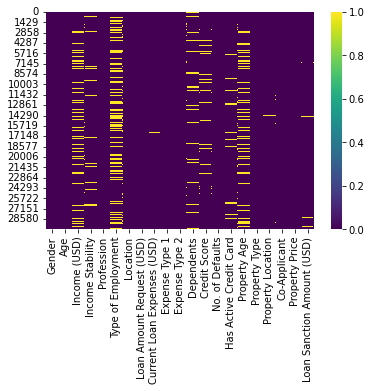

In [ ]:
#ploting a heatmap to check null values 
sns.heatmap(loan.isnull(),cmap='viridis')



1.  This plot show the null values in the dataset.
2.  The numbers from 0 to 1 indicates amount of null values
3.  The yellow color (1)  indicates null values.
4.  And purple color (0)  indicates non-null values.




(array([6338., 2517., 2482., 1980., 2461., 2526., 1998., 2428., 2825.,
        4445.]),
 array([18. , 22.7, 27.4, 32.1, 36.8, 41.5, 46.2, 50.9, 55.6, 60.3, 65. ]),
 <a list of 10 Patch objects>)

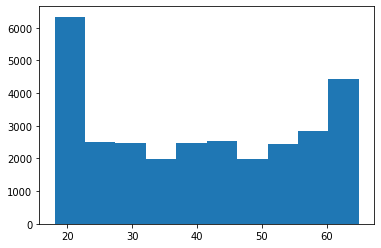

In [ ]:
plt.hist(loan['Age'])



*  It seems that most of the people are aged 20.
*  And people with age 60 are also more in number.


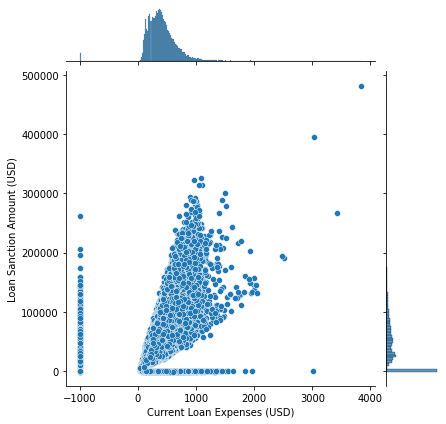

In [ ]:
sns.jointplot(x='Current Loan Expenses (USD)',y='Loan Sanction Amount (USD)',data=loan)


*  they look like they are directly proportional
*   Most of the loan expenses lie in between 0 to 2000.




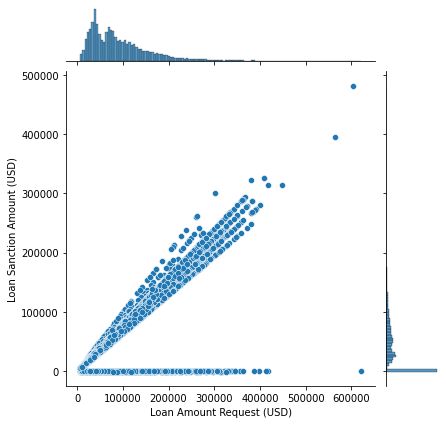

In [ ]:
sns.jointplot(x='Loan Amount Request (USD)',y='Loan Sanction Amount (USD)',data=loan)

* They look like they are directly proportional.
* Loan Sanction Amount(USD) remained 0, for some Loan Request Amount, it means    that their loan was not approved. 


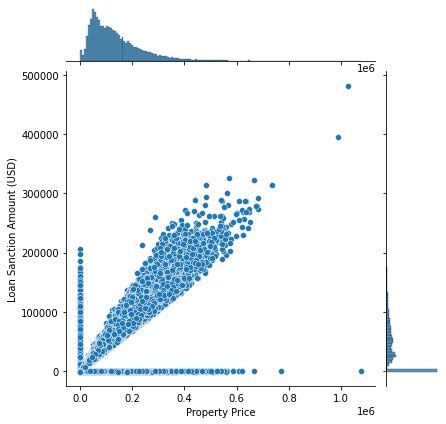

In [ ]:
sns.jointplot(x='Property Price',y='Loan Sanction Amount (USD)',data=loan)

* They look like they are directly proportional.
* Loan Sanction Amount is more in number for Property Price 0.2 to 0.4.

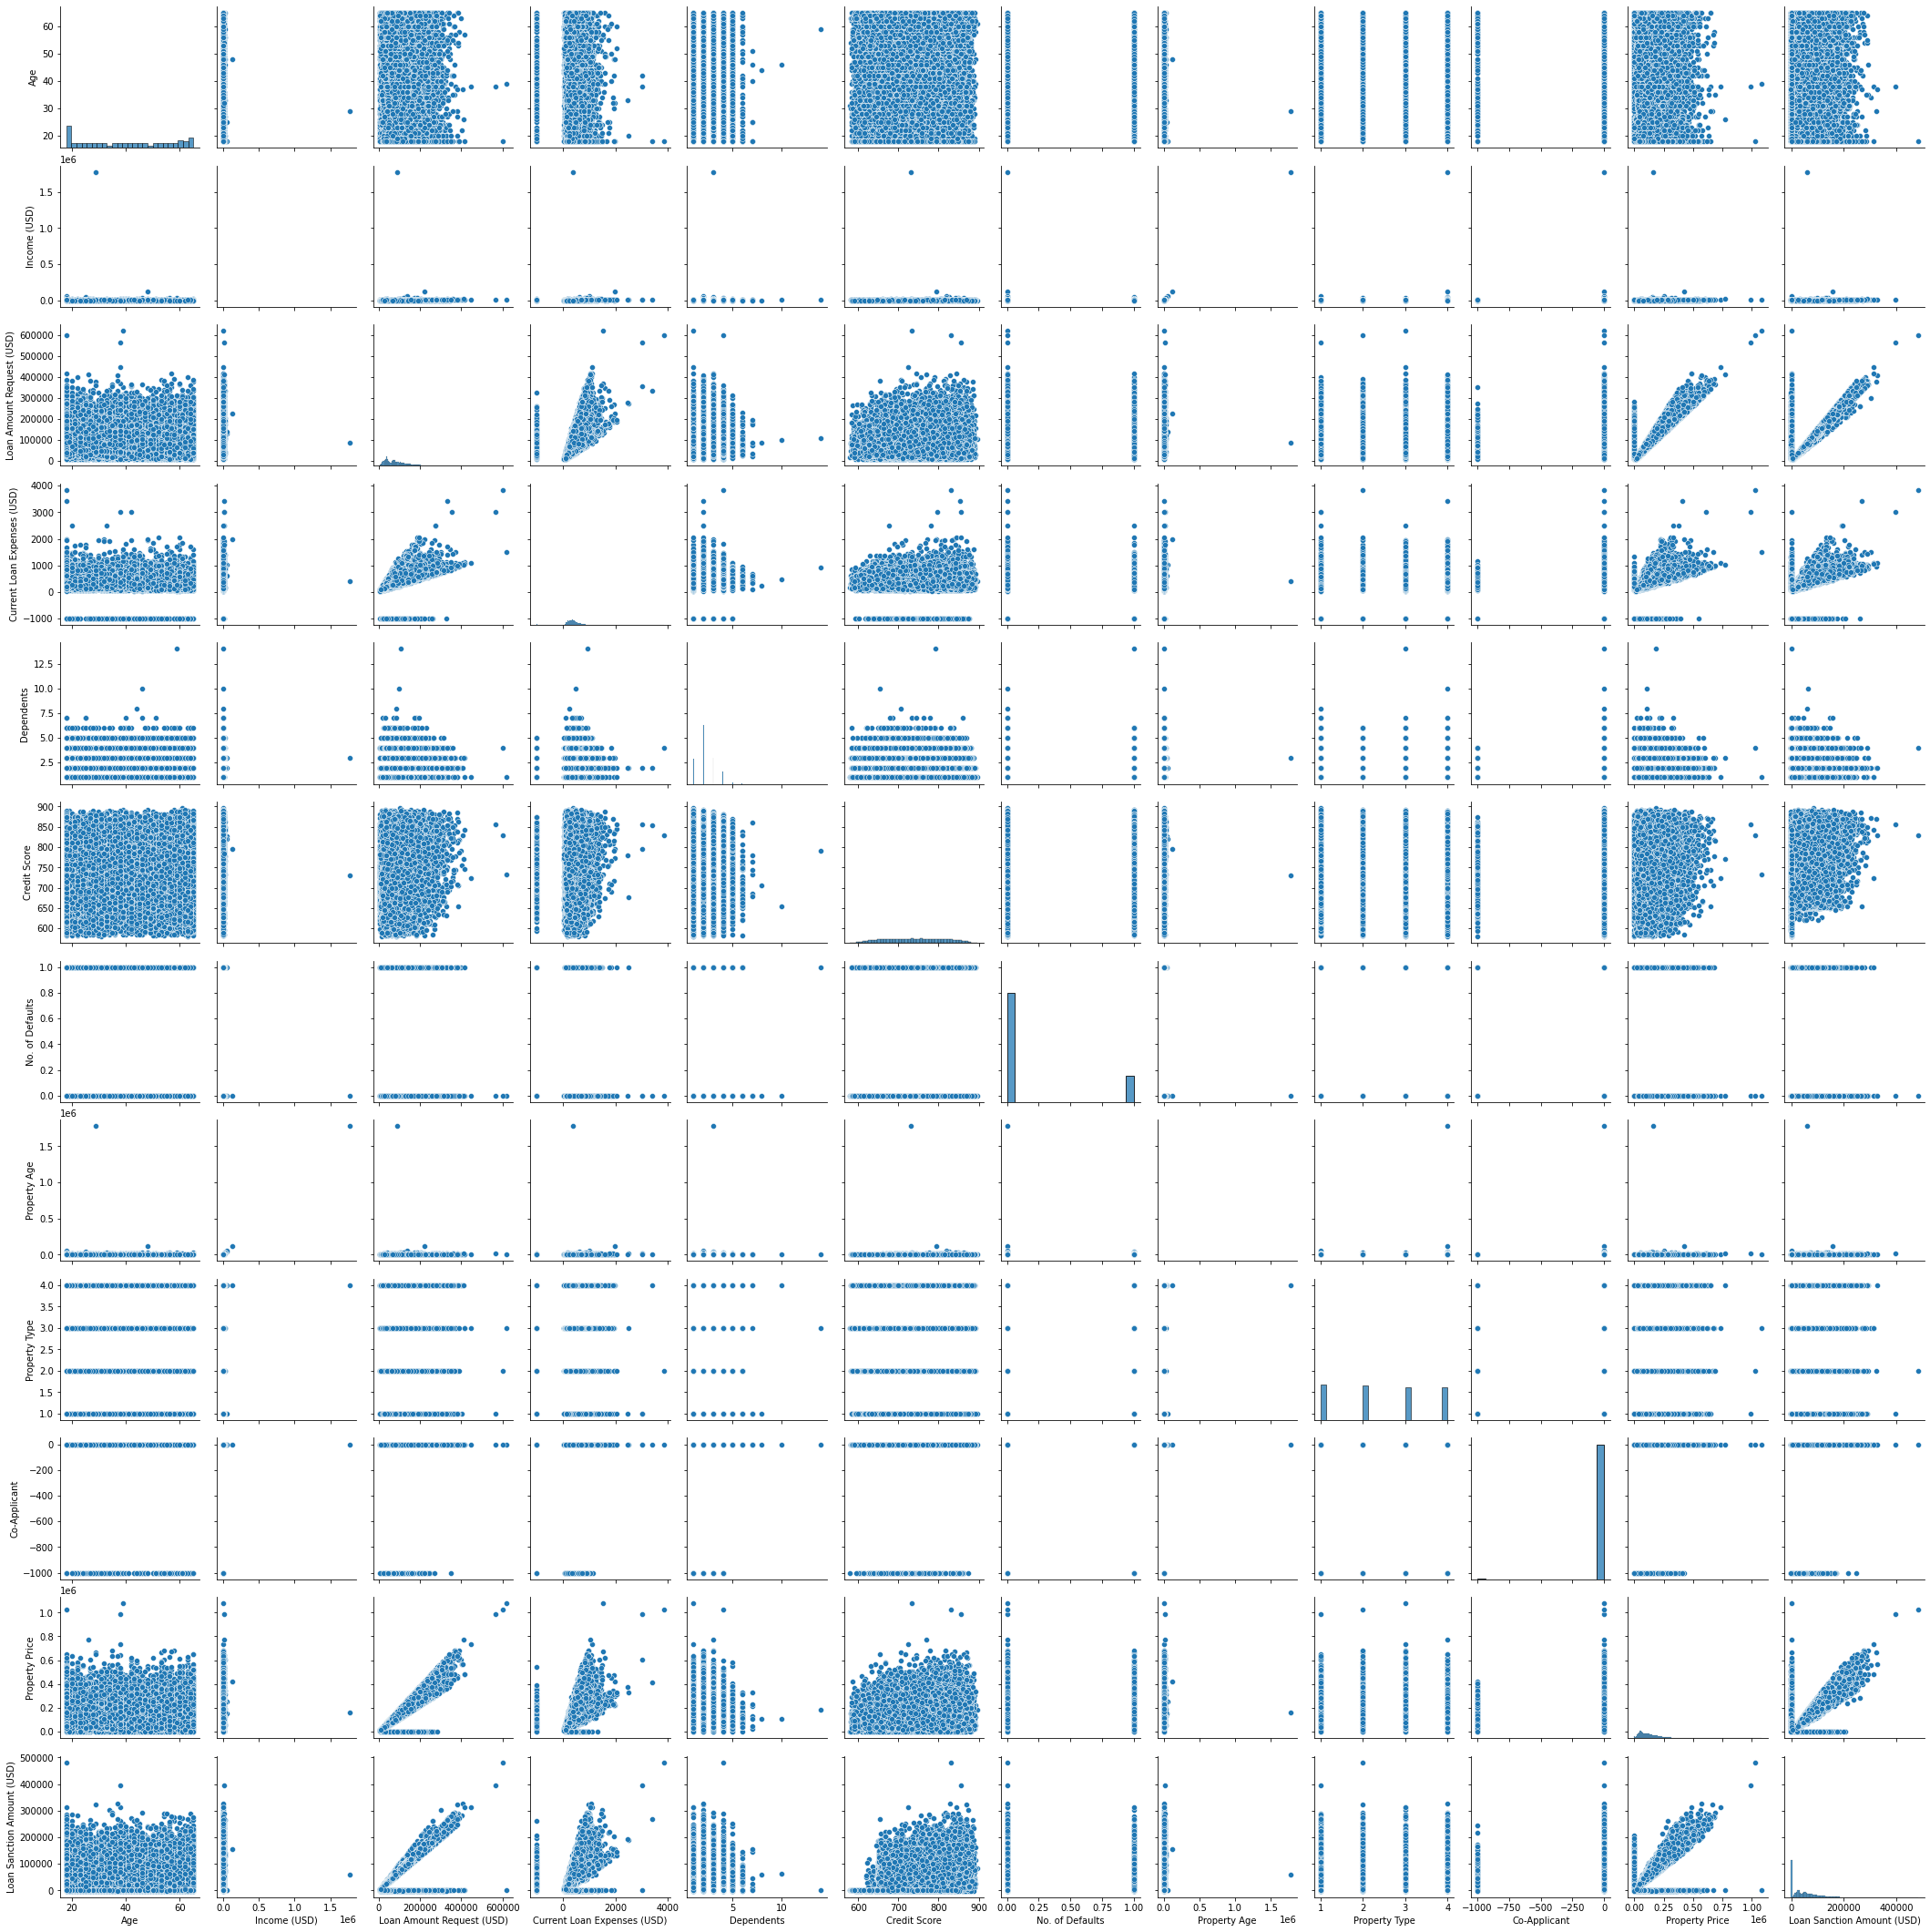

In [ ]:
sns.pairplot(loan)

* While more features are directly proportional to each other.
* So it would be better to start with linear regression.

In [ ]:
#Dealing with String null values
cols = loan[["Gender", "Property Location", "Income Stability", "Has Active Credit Card", "Type of Employment", "Has Active Credit Card", "Expense Type 1", "Expense Type 2"]] 
for  i in cols: 
    loan[i].fillna(loan[i].mode().iloc[0], inplace=True)

In [ ]:
#Dealing with numeric null values
n_cols = loan[["Income (USD)", "No. of Defaults",  "Property Type", "Current Loan Expenses (USD)", "Co-Applicant", "Property Price", "Dependents", "Credit Score", "Property Age", "Loan Amount Request (USD)", "Loan Sanction Amount (USD)"]] 
for i in n_cols: 
    loan[i].fillna(loan[i].mean(axis=0), inplace=True)

In [ ]:
#convert String  to numeric values
ord_enc = OrdinalEncoder() 
loan[["Gender", 'Income Stability', 'Profession', 'Location', 'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card', 'Type of Employment', 'Property Location']] = ord_enc.fit_transform(loan[["Gender", 'Income Stability', 'Profession', 'Location', 'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card', 'Type of Employment', 'Property Location']])
loan.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,0.0,56,1933.050000,1.0,7.0,14.0,1.0,72809.58,241.08,0.0,0.0,3.000000,809.44,0,0.0,1933.05000,4,0.0,1,119933.46,54607.18
1,1.0,32,4952.910000,1.0,7.0,8.0,1.0,46837.47,495.81,0.0,1.0,1.000000,780.40,0,2.0,4952.91000,2,0.0,1,54791.00,37469.98
2,0.0,65,988.190000,0.0,3.0,8.0,1.0,45593.04,171.95,0.0,1.0,1.000000,833.15,0,2.0,988.19000,2,2.0,0,72440.58,36474.43
3,0.0,65,2630.574417,0.0,3.0,8.0,0.0,80057.92,298.54,0.0,1.0,2.000000,832.70,1,2.0,2631.11944,2,1.0,1,121441.51,56040.54
4,0.0,31,2614.770000,1.0,7.0,6.0,1.0,113858.89,491.41,0.0,1.0,2.253027,745.55,1,0.0,2614.77000,4,1.0,1,208567.91,74008.28


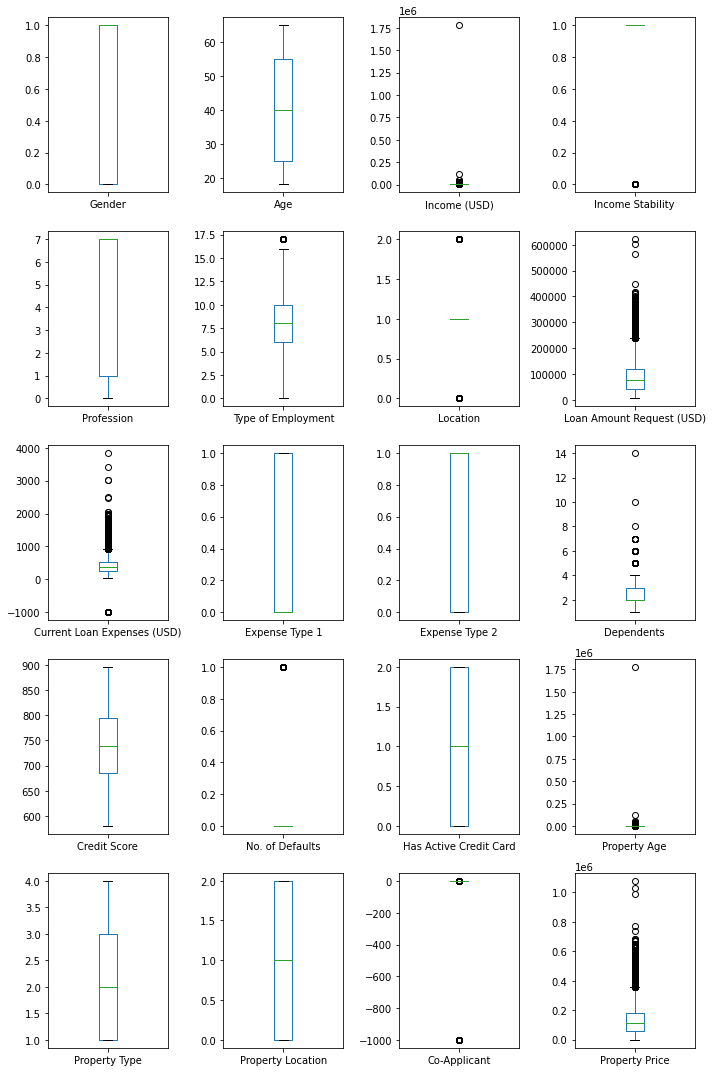

In [ ]:
plt.figure(figsize=(10,15))
try:
  for i, col in enumerate(list(loan.columns.values)):
    plt.subplot(5,4,i+1 )
    loan.boxplot(col)
    plt.grid()
    plt.tight_layout()
except ValueError:
  pass

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

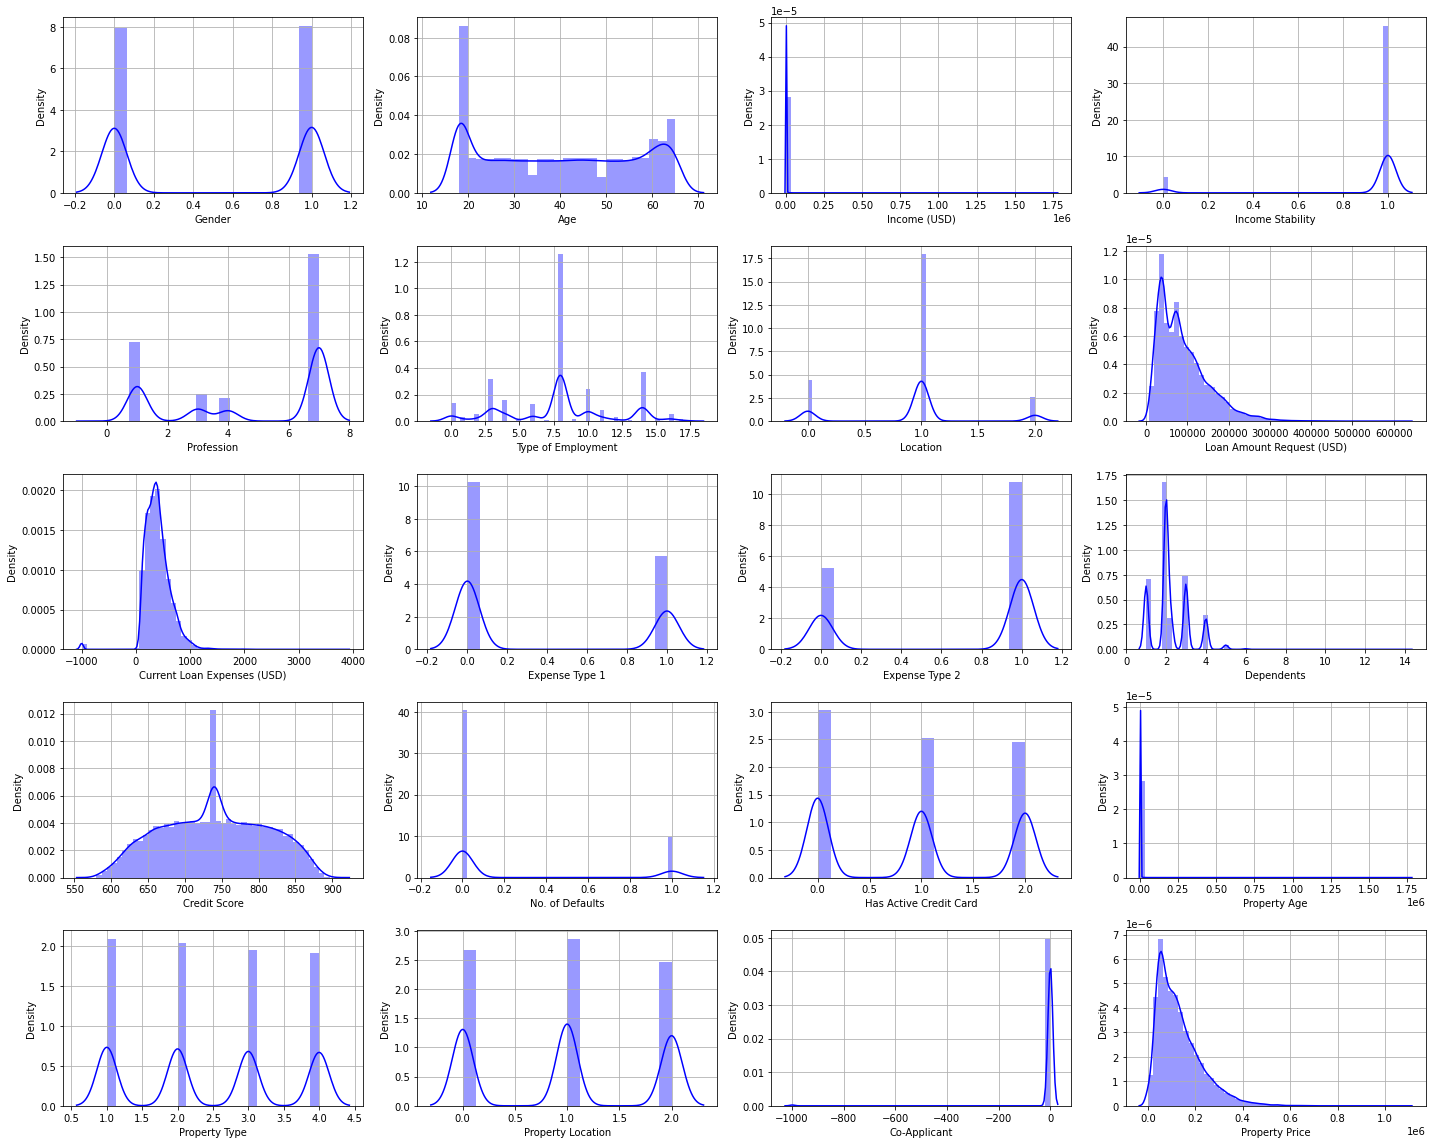

In [ ]:
plt.figure(figsize=(20,16))
try:
  for i,col in enumerate(list(loan.columns.values)):
      plt.subplot(5,4,i+1)
      sns.distplot(loan[col], color='b', kde=True, label='data')
      plt.grid()
      plt.tight_layout() 
except ValueError:
  pass

In [ ]:
#check if any null values
loan.isnull().sum()

Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

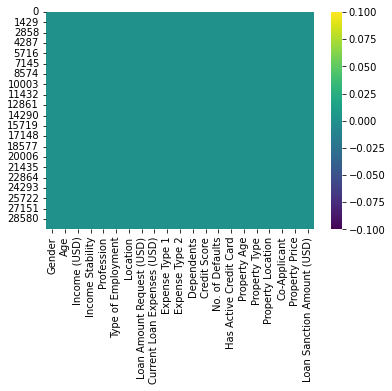

In [ ]:
sns.heatmap(loan.isnull(),cmap='viridis')



1.  This plot shows the null values in the dataset.
2.  The numbers from -1 to 1 indicate amount of null values.
3.  The number 0 color(Blue) indicates that there are no null values.


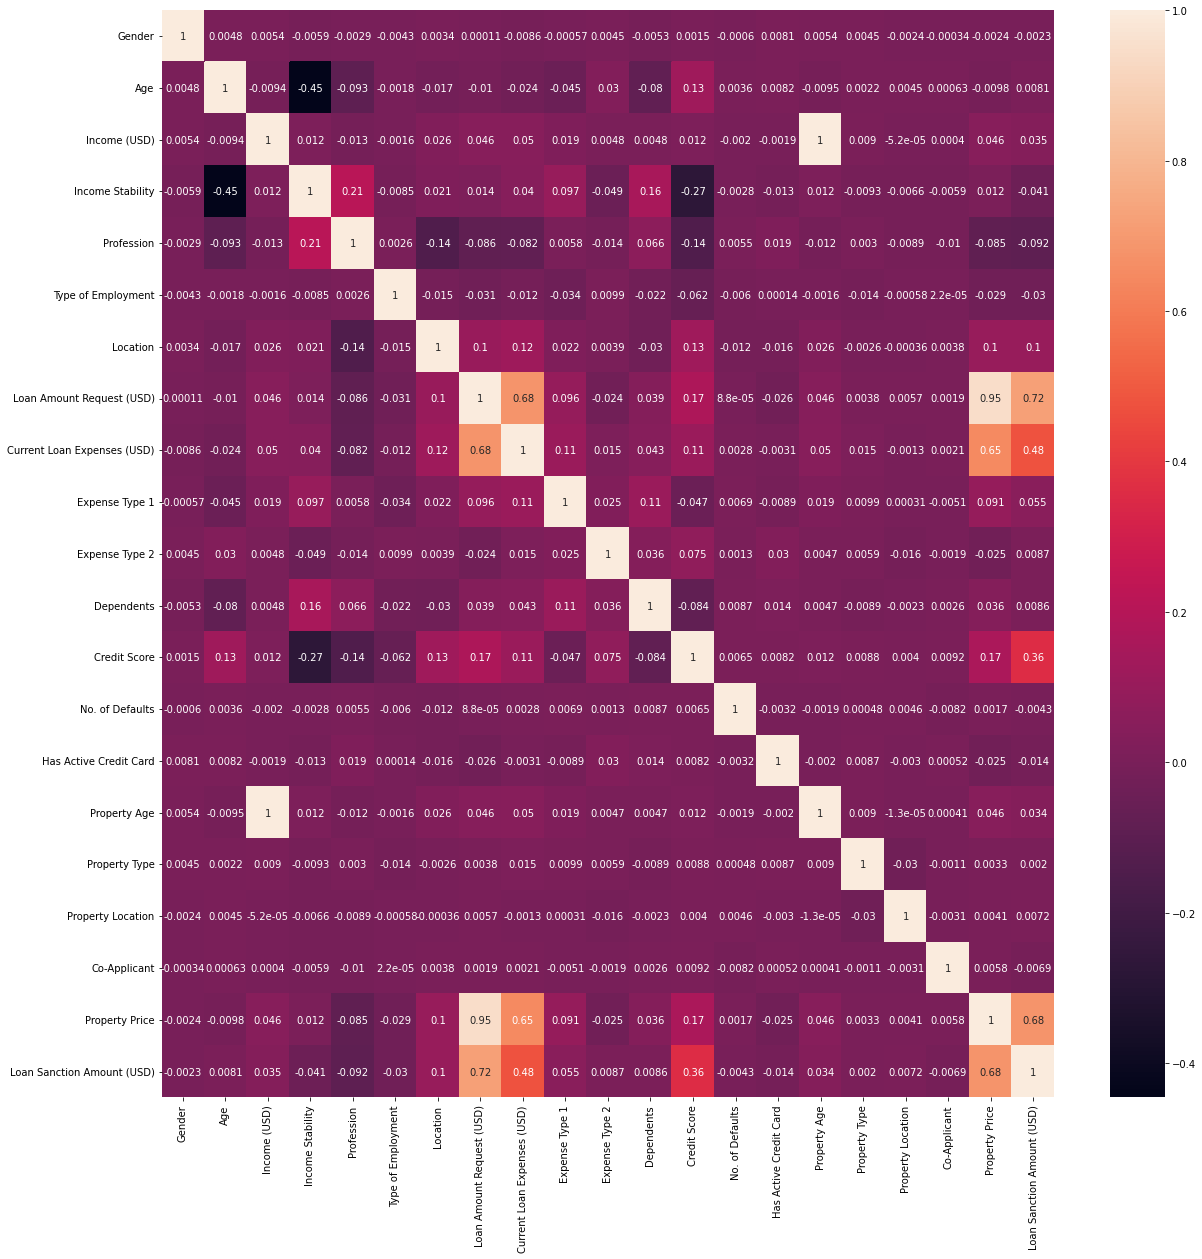

In [ ]:
#Ploat a Heatmap 
cm_1 = loan.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cm_1, annot=True)
plt.show()



*   This plot shows how closely the columns are related.
*   It is rated from in the form of numbers.
*   If the number is closer to 0, then they are not much related to each other.
*   If the number is colser to 1, then they are highly related to each other.





In [ ]:
y = loan['Loan Sanction Amount (USD)']
x = loan.drop(['Loan Sanction Amount (USD)'], axis = 1)

In [ ]:
#split the datset to Training data(70%) and Testing data(30%)
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [ ]:
#standardize the data
standardScaler = StandardScaler()
standardScaler.fit(x_train)
x_train = standardScaler.transform(x_train)
x_test = standardScaler.transform(x_test)

**Preparing Machine Learning Models**

In [ ]:
#Linear Regression Model
#create instence of the model
lm=LinearRegression()      
lm.fit(x_train,y_train)    #train the model on training data
linear_predict = lm.predict(x_test)     #predict the output by using testing data and store in variable  
linear_accuracy = r2_score(y_test,linear_predict) #measure the accuracy by r2 score
print('r2_score = '+ str(linear_accuracy))

r2_score = 0.5669654244336306


In [ ]:
#Decision Tree Regression Model
#cerate an instance of the model
decisionModel = DecisionTreeRegressor()
decisionModel.fit(x_train,y_train)        #train the model on training data
decisionTree_predict = decisionModel.predict(x_test)    #predict the output by using testing data and store in variable
decisionTree_acuracy = r2_score(y_test, decisionTree_predict)
print('r2_score = '+ str(decisionTree_acuracy))



r2_score = 0.4871413828451603


In [ ]:
#Random Forest Regression Model
#create an instance of the model 
forest=RandomForestRegressor()
forest.fit(x_train,y_train)     #train the model on training data
randonForest_predict =forest.predict(x_test)        #predict the output by using testing data and store in variable
randomForest_accuracy = r2_score(y_test,randonForest_predict)
print('r2_score = '+ str(randomForest_accuracy))

r2_score = 0.7460076644250944


In [ ]:
#Bayesian Ridge Model
#create an instance of the model
Bayesian_model = linear_model.BayesianRidge()
Bayesian_model.fit(x_train, y_train)         #train the model on training data
Bayesian_predict = Bayesian_model.predict(x_test)      #predict the output by using testing data and store in variable
Bayesian_accuracy = r2_score(y_test,Bayesian_predict)
print('r2_score = '+ str(Bayesian_accuracy))

r2_score = 0.5670822174048955


In [ ]:
#Gradient Boosting Regression Model
#define params
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
#create an instance of the model
gradient_model = ensemble.GradientBoostingRegressor(**params)
gradient_model.fit(x_train, y_train)           #train the model on training data
gradient_predict = gradient_model.predict(x_test)          #predict the output by using testing data and store in variable
gradient_accuracy = r2_score(y_test, gradient_predict)
print('r2_score = '+ str(gradient_accuracy))

r2_score = 0.7429693135243298


In [ ]:
#XGB Regression Model
xgb = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,                 
             colsample_bynode=1, colsample_bytree=1,importance_type='gain', learning_rate=0.1, 
             max_depth=5, min_child_weight=1, n_estimators=500, objective='reg:squarederror', 
             random_state=42, reg_lambda=1, scale_pos_weight=1,subsample=1, verbosity=1)            #create an instance of the model and pass all the necessary parameters
xgb.fit(x_train, y_train)     #train the model on training data
xgb_predict = xgb.predict(x_test) #predict the output by using testing data and store in variable
xgb_accuracy = r2_score(y_test, xgb_predict)
print('r2_score = '+ str(xgb_accuracy))

r2_score = 0.7429961073621583


In [ ]:
#Lasso regression model
lasso = linear_model.Lasso(alpha=1.0, max_iter=1000, tol = 0.0001, random_state = None )
lasso.fit(x_train,y_train)            #train the model on training data
lasso_predict = lasso.predict(x_test)     #predict the output by using testing data and store in variable
lasso_accuracy = r2_score(y_test,lasso_predict)
print('r2_score = '+ str(lasso_accuracy))

r2_score = 0.5670709061614908


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6075956367097.857, tolerance: 4901660312.253305
  positive)


In [ ]:
#Adaboosting model
adaboost_model = AdaBoostRegressor()      #create an instance of the model
adaboost_model.fit(x_train, y_train)      #train the model on training data
adaboost_predict =adaboost_model.predict(x_test)    #predict the output by using testing data and store in variable
adaboost_accuracy = r2_score(y_test, adaboost_predict)
print('r2_score = '+ str(adaboost_accuracy))

r2_score = 0.47545320651129286


In [ ]:
#KNN (K Nearest Neighbours)
knn = KNeighborsRegressor()     #create an instance of the model
knn.fit(x_train, y_train)     #train the model on training data
knn_pred = knn.predict(x_test)        #predict the output by using testing data and store in variable
knn_accuracy = r2_score(y_test, knn_pred)
print('r2_score = '+ str(knn_accuracy))

r2_score = 0.46384960351958426


In [ ]:
#Artificial Neural Network using Tensorflow
warnings.filterwarnings('ignore')   #ignoring the warnings  
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation='relu'))        #create the layers
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(x = x_train,              #train the model on training data by defining neccessary parameters
        y = y_train,      
        batch_size = 32, 
        epochs = 100, 
        shuffle = 1,
        validation_split = 0.05)

annpred = ann.predict(x_test)         #predict the output by using testing data and store in variable
ann_accuracy = r2_score(y_test,annpred)
print('r2_score = '+ str(ann_accuracy))

Epoch 1/100
624/624 [==============================] - 1s 1ms/step - loss: 4601992704.0000 - val_loss: 4607784448.0000
Epoch 2/100
624/624 [==============================] - 1s 1ms/step - loss: 4552239616.0000 - val_loss: 4508092416.0000
Epoch 3/100
624/624 [==============================] - 1s 1ms/step - loss: 4395564544.0000 - val_loss: 4281241856.0000
Epoch 4/100
624/624 [==============================] - 1s 1ms/step - loss: 4114943488.0000 - val_loss: 3933698560.0000
Epoch 5/100
624/624 [==============================] - 1s 1ms/step - loss: 3726373632.0000 - val_loss: 3490570496.0000
Epoch 6/100
624/624 [==============================] - 1s 1ms/step - loss: 3265208832.0000 - val_loss: 3000733184.0000
Epoch 7/100
624/624 [==============================] - 1s 1ms/step - loss: 2783762176.0000 - val_loss: 2524566272.0000
Epoch 8/100
624/624 [==============================] - 1s 1ms/step - loss: 2335654656.0000 - val_loss: 2109134720.0000
Epoch 9/100
624/624 [===========================